# Select good SED in the catalog Pickle

In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [35]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [36]:
index_num=0  # index of counts
index_val=1  # index validity flag
index_temp=2
index_logg=3
index_logz=4
index_spec=5

## Number of good SED to select

In [37]:
#input_fits='sedgrid_phoenixmodels_good.fits'
#input_fits='sedgrid_phoenixmodels_noextinct.fits'

input_fits='sedgrid_pickle_uvk_all.fits'
output_fits='sedgrid_pickle_uvk_selected.fits'

#input_fits='sedgrid_pickle_uvi_all.fits'
#output_fits='sedgrid_pickle_uvi_selected.fits'

In [38]:
hdul = fits.open(input_fits)

In [39]:
hdul.info()

Filename: sedgrid_pickle_uvk_all.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (8515, 132)   float64   


In [40]:
hdr=hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8515                                                  
NAXIS2  =                  132                                                  
NBSED   =                  131                                                  
NBWLBIN =                 8510                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11510.0                                                  
WLBINWDT=                  1.0                                                  
SEDMODEL= 'pickle_uvk'                                                          
IDX_SPEC=                    5                                                  
IDX_MAG =                 85

In [41]:
#index_num=hdr["IDX_NUM"]
#index_val=hdr["IDX_VAL"]
#index_temp=hdr["IDX_TEMP"]
#index_logg=hdr["IDX_LOGG"]
#index_logz=hdr["IDX_LOGZ"]
index_spec=hdr["IDX_SPEC"]
index_mag=hdr["IDX_MAG"]

# Image

In [42]:
def plot_sedimg(data):
    plt.figure(figsize=(15,10))   
    img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
    plt.colorbar(img)
    plt.grid(True)
    plt.title('sed grid')
    plt.xlabel('bin number of wavelengths')
    plt.ylabel('sed number')
    plt.show()

In [43]:
def plot_allsed(data):
    plt.figure()   
    
    for idx in np.arange(data.shape[0]-1):
        if data[1+idx,index_val]>0:
            plt.semilogy(data[0,index_spec:],data[1+idx,index_spec:],'-')
    plt.grid(True)
    plt.title('sed')
    plt.xlabel('wavelength (A)')
    plt.ylabel('sed (flam)')
    plt.show()

In [44]:
data = hdul[0].data

# Show all spectra

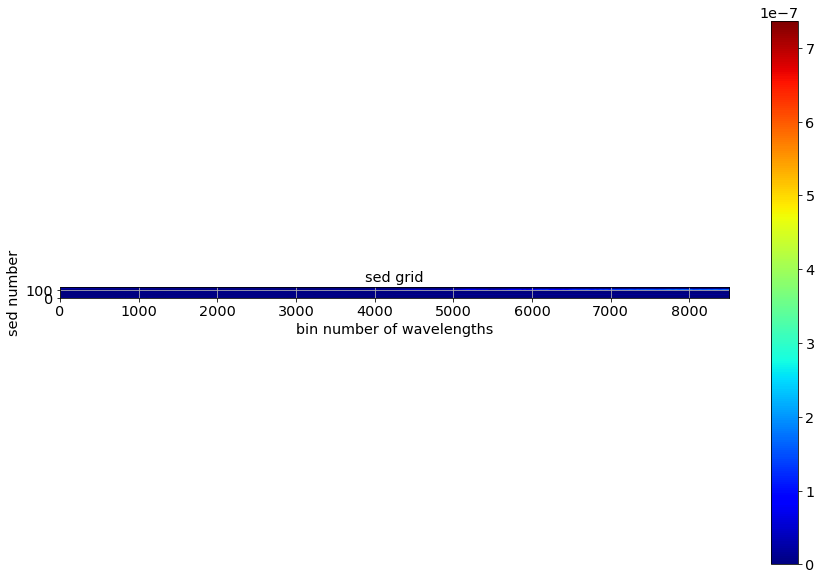

In [45]:
plot_sedimg(data)

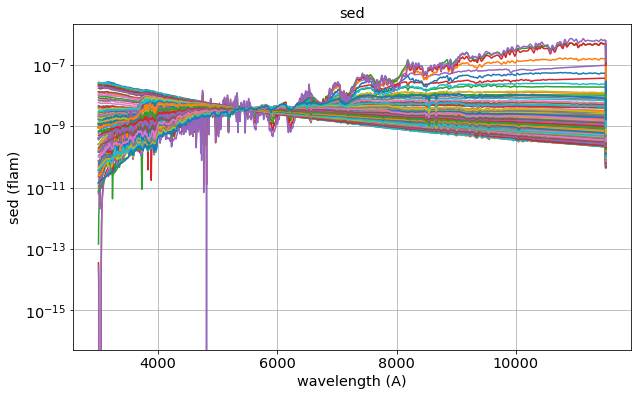

In [46]:
plot_allsed(data)

# Show wavelength range

Text(0.5,0,u'Wavelength index')

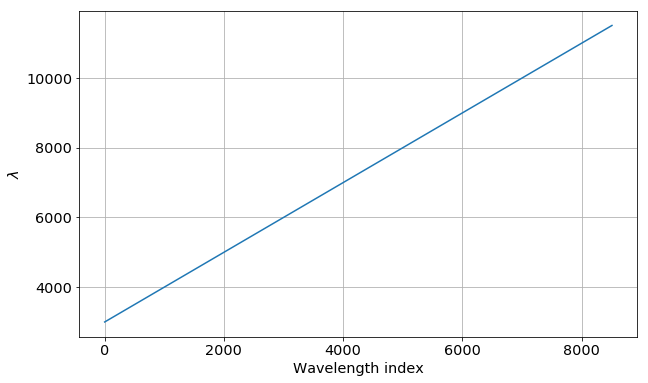

In [47]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

In [48]:
print data[0,index_spec:].max()

11510.0


# Show good and bad indexes 

## Good indexes

In [49]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [50]:
good_indexes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131])

In [51]:
NumberOfSEDToSelect=len(good_indexes)

## Bad indexes

In [52]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

In [53]:
bad_indexes

array([0])

# Select good indexes

In [54]:
good_image=data[good_indexes,:]

In [55]:
good_image.shape

(131, 8515)

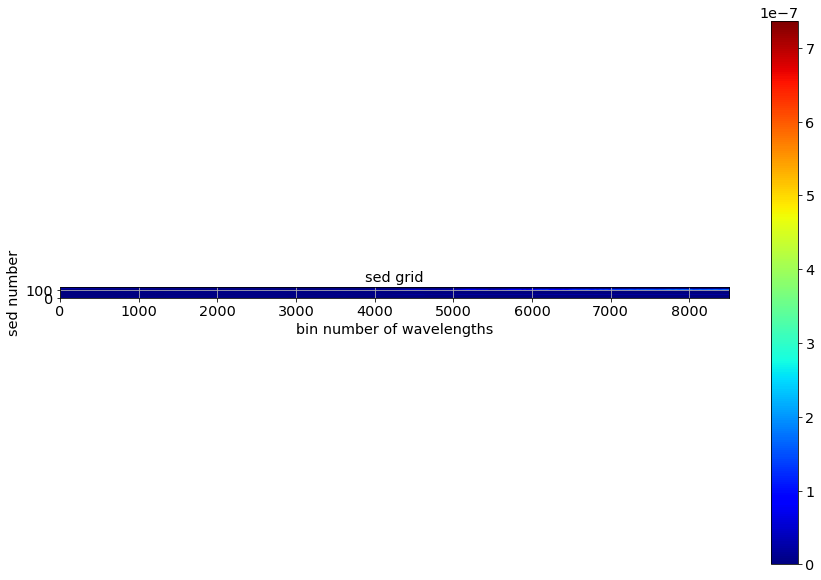

In [56]:
plot_sedimg(good_image)

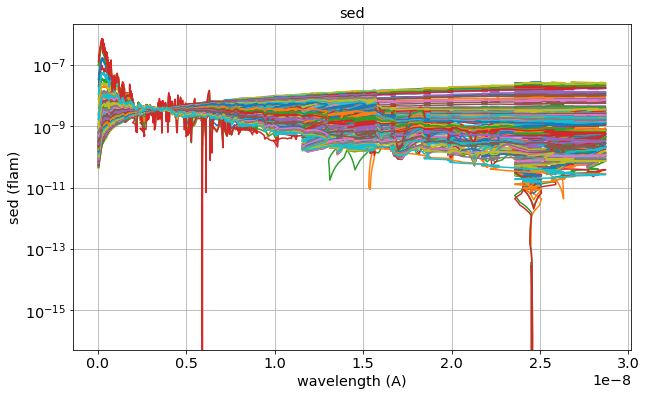

In [57]:
plot_allsed(good_image)

# Creation of output table

In [58]:
data_out=np.zeros((NumberOfSEDToSelect+1,data.shape[1]))

In [59]:
data_out[0,index_spec:]=data[0,index_spec:]

In [60]:
count=0
while count<NumberOfSEDToSelect:
    ridx=np.random.randint(1,data.shape[0]+1,1)[0]
    if ridx in good_indexes:
        #print ridx
        count+=1
        data_out[count,:]=data[ridx,:]

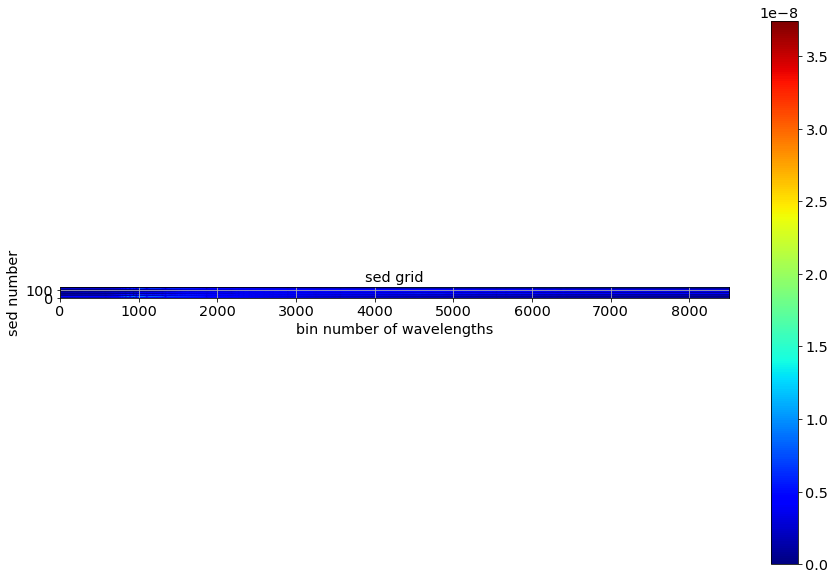

In [61]:
plot_sedimg(data_out)

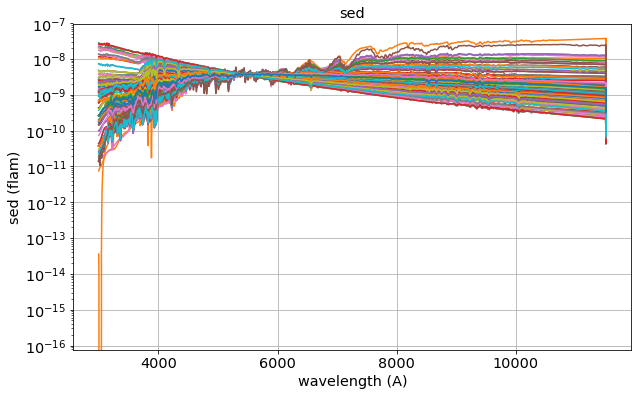

In [62]:
plot_allsed(data_out)

Text(0.5,0,u'temperature')

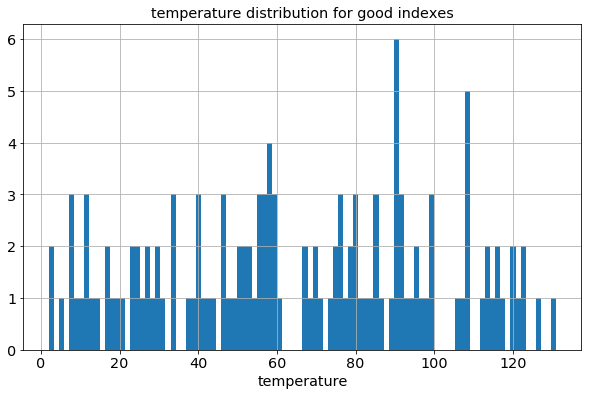

In [63]:
plt.hist(data_out[1:,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

Text(0.5,0,u'log(G)')

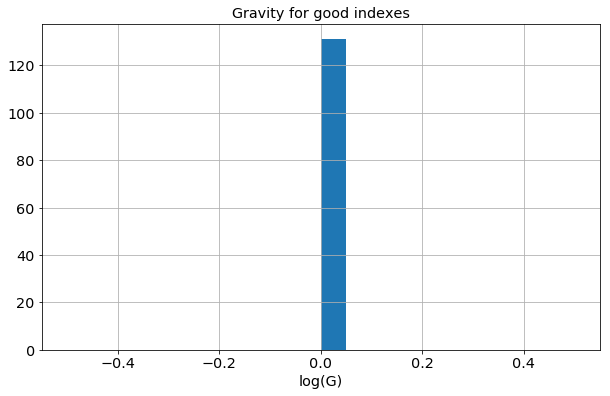

In [64]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

Text(0.5,0,u'log(Z)')

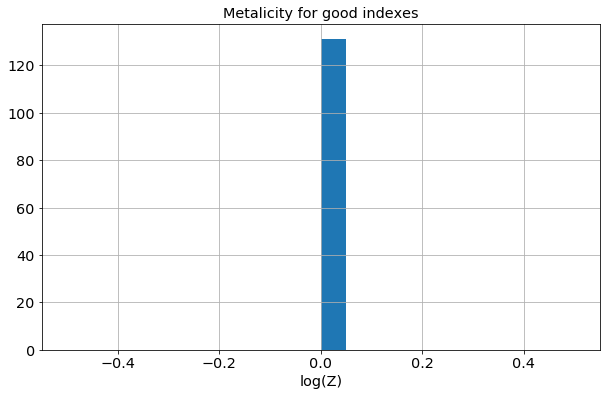

In [65]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

In [66]:
hdu = fits.PrimaryHDU(data_out,header=hdul[0].header)
hdu.writeto(output_fits,overwrite=True)